# import libraries

In [160]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# load data

In [116]:
data = pd.read_csv('MariBisnis.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Data Preprocessing : Feature Engineering

In [175]:
df = data.copy()
df.date = pd.to_datetime(df.date)
df.yr_built = pd.to_datetime(df.yr_built, format='%Y')
df['age']= ((df.date - df.yr_built)/np.timedelta64(1,'Y')).astype(np.int)
df['is_renovated'] = np.where(df['yr_renovated']==0, df['yr_renovated'], 1)
df['has_basement'] = np.where(df['sqft_basement']==0, df['sqft_basement'], 1)
df['price'] = np.round(df['price'],-2)
df.drop(['date', 'yr_built'], axis=1, inplace=True)
df.set_index('id', inplace=True)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,is_renovated,has_basement
id,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,3,...,1955-01-01,0,98178,47.51,-122.26,1340,5650,59,0,0
6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,3,...,1951-01-01,1991,98125,47.72,-122.32,1690,7639,63,1,1
5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,3,...,1933-01-01,0,98028,47.74,-122.23,2720,8062,82,0,0
2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,5,...,1965-01-01,0,98136,47.52,-122.39,1360,5000,49,0,1
1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,3,...,1987-01-01,0,98074,47.62,-122.05,1800,7503,28,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21,360000.00,3,2.50,1530,1131,3.00,0,0,3,...,2009-01-01,0,98103,47.70,-122.35,1530,1509,5,0,0
6600060120,2015-02-23,400000.00,4,2.50,2310,5813,2.00,0,0,3,...,2014-01-01,0,98146,47.51,-122.36,1830,7200,1,0,0
1523300141,2014-06-23,402100.00,2,0.75,1020,1350,2.00,0,0,3,...,2009-01-01,0,98144,47.59,-122.30,1020,2007,5,0,0


In [177]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,is_renovated,has_basement
id,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,3,...,1955-01-01,0,98178,47.51,-122.26,1340,5650,59,0,0
6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,3,...,1951-01-01,1991,98125,47.72,-122.32,1690,7639,63,1,1
5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,3,...,1933-01-01,0,98028,47.74,-122.23,2720,8062,82,0,0
2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,5,...,1965-01-01,0,98136,47.52,-122.39,1360,5000,49,0,1
1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,3,...,1987-01-01,0,98074,47.62,-122.05,1800,7503,28,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21,360000.00,3,2.50,1530,1131,3.00,0,0,3,...,2009-01-01,0,98103,47.70,-122.35,1530,1509,5,0,0
6600060120,2015-02-23,400000.00,4,2.50,2310,5813,2.00,0,0,3,...,2014-01-01,0,98146,47.51,-122.36,1830,7200,1,0,0
1523300141,2014-06-23,402100.00,2,0.75,1020,1350,2.00,0,0,3,...,2009-01-01,0,98144,47.59,-122.30,1020,2007,5,0,0


In [173]:
df.sample(10).to_csv('sample.csv')

# Data Preprocessing : Normalization

In [119]:
from scipy.stats import zscore
z_scores = zscore(df)
filter = (np.abs(z_scores)<3).all(axis=1)
new_df_filtered = df

# Processing

In [120]:
X = new_df_filtered.drop('price',1)
y = new_df_filtered.price

# Hyperparameter tuning

In [161]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer

In [122]:
parameter = {
    'tree_method': ['hist'],
    'objective': ['reg:squarederror'], #reg:linear
    'learning_rate': [0.01, 0.1],
    'max_depth': [5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.78],
    'colsample_bytree': [0.5, 0.78],
    'n_estimators' : [100, 200, 500]
}

xgb_model = XGBRegressor()

grid_search = GridSearchCV(estimator = xgb_model,
                       param_grid = parameter,                                               
                       scoring = 'neg_mean_squared_error',  #MSE
                       cv = 6,
                       n_jobs = -1,
                       verbose = 1)

grid_search.fit(X,y)
grid_search.best_params_

Fitting 6 folds for each of 216 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 33.0min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 63.6min
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed: 68.2min finished


{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.78,
 'tree_method': 'hist'}

# Train and test split data

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.78, random_state=0)

# Build Model with Best Parameter

In [124]:
model = XGBRegressor(
    colsample_bytree= 0.5,
     learning_rate= 0.1,
     max_depth= 5,
     min_child_weight= 3,
     n_estimators= 500,
     objective= 'reg:squarederror',
     subsample= 0.78,
     tree_method= 'hist')
model_1 = model.fit(X_train, y_train)

# Predict Model

In [125]:
y_pred = model_1.predict(X_test)

# Visualisasi Hasil Prediksi terhadap Aktual

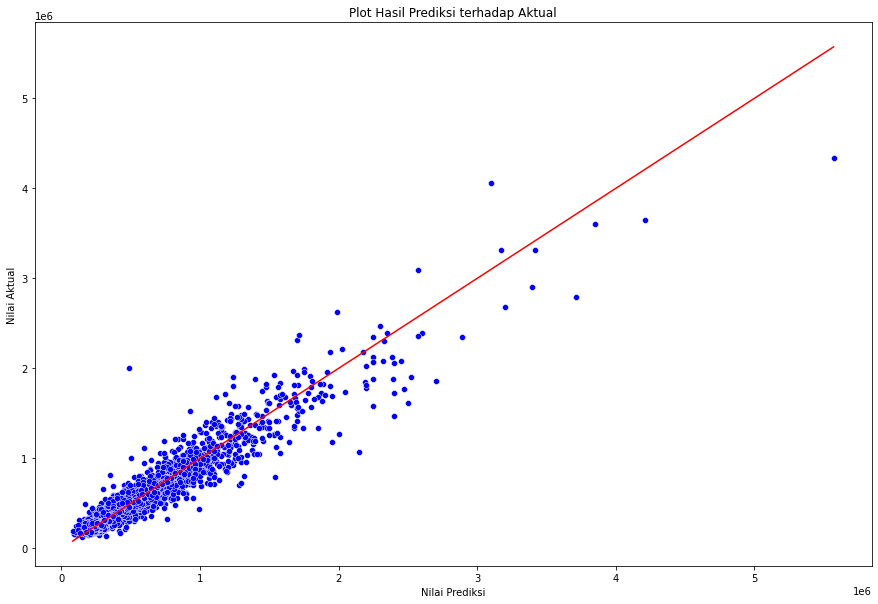

In [167]:
import warnings
warnings.filterwarnings('ignore')

y_predict = y_pred
plt.figure(figsize=(15,10))
sns.scatterplot(y_test,y_predict,color='blue')
sns.lineplot(y_test,y_test,color='red')
plt.title('Plot Hasil Prediksi terhadap Aktual')
plt.xlabel('Nilai Prediksi')
plt.ylabel('Nilai Aktual')
plt.show()

# Cross Validate dengan 6-Fold

In [137]:
from sklearn.model_selection import KFold, cross_validate
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

scoring = {'MSE' : make_scorer(mean_squared_error),
          'MAPE' : make_scorer(mean_absolute_percentage_error),
           'R2' : make_scorer(r2_score)
          }
kfold = KFold(n_splits=6, random_state=1234, shuffle = True)
results_reg = cross_validate(estimator=xgb_model,X=X,
                                          y=y,
                                          cv=kfold,
                                          scoring=scoring)

results_reg

{'fit_time': array([3.22012711, 2.23005581, 2.49504304, 2.47831392, 2.26833844,
        2.32669449]),
 'score_time': array([0.02213359, 0.        , 0.01562428, 0.01561403, 0.0135181 ,
        0.01501989]),
 'test_MSE': array([1.57417414e+10, 1.33339582e+10, 1.56542308e+10, 1.72476616e+10,
        1.30158533e+10, 1.27770839e+10]),
 'test_MAPE': array([12.75417956, 12.82523091, 13.00451182, 13.52035724, 12.70195375,
        12.71833413]),
 'test_R2': array([0.88418403, 0.89912198, 0.87554843, 0.88669982, 0.89750219,
        0.90563098])}

# Hasil Metriks

In [150]:
r2 = (results_reg.get('test_R2'))
mse = np.sqrt(results_reg.get('test_MSE'))
mape = (results_reg.get('test_MAPE'))

print('Rataan MSE  : ', "%.7f" % (mse.mean()))
print('Rataan MAPE : ', "%.2f"% (mape.mean()),'%')
print('Rataan R2   : ', "%.2f"% (r2.mean()*100),'%')

Rataan MSE  :  120751.4807440
Rataan MAPE :  12.92 %
Rataan R2   :  89.14 %


# Perbandingan Harga Aktual dan Prediksi

In [157]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.concat([pd.DataFrame(y_test).reset_index(), pd.DataFrame((y_pred).astype(np.float))], axis=1)

,id,price,0
0,1453602313,297000.00,322574.66
1,2225059214,1578000.00,1662438.12
2,2768000270,562100.00,521013.62
3,6819100040,631500.00,636850.56
4,4027700666,780000.00,640220.06
...,...,...,...
4750,2085700050,420000.00,405566.78
4751,4178500150,289000.00,265960.62
4752,3123059107,555000.00,719405.19
4753,5422570260,405000.00,556683.44


In [171]:
import joblib
joblib.dump(model_1, 'xgb.joblib')

['xgb.joblib']